This is a tutorial for modeling the thermodynamics of mixing and closely follows material from Chapter 7 of Polymer Chemistry by P.C. Hiemenz and T.P. Lodge, 2007.

Regular solution theory is a simple statistical model useful for providing an expression for the free energy of mixing of two components.

To get the entropy of mixing, we use the Boltzmann definition of entropy:

$S = kln\Omega$

where $\Omega$ is the total number of possible configurations that a system can adopt. 

For our regular solution model, we will use a square lattice with sites that can be occupied by either species 1 or species 2, the total number of lattice sites is $m$, the number of species 1-occupied sites is $m_1$ and likewise for species 2 and $m_2$.

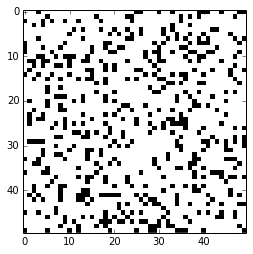

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import random

lattice_width = 50
lattice_height = 50
m_sites = lattice_width*lattice_height
lattice = np.zeros((lattice_height,lattice_width))

m_1 = 0
m_2 = 0

for i in range(0,lattice_height):
    for j in range(0,lattice_width):
        random_number = random()
        if random_number > 0.2:
            lattice[i,j] = 1
            m_1 += 1
        else:
            lattice[i,j] = 2
            m_2 += 1
            
plt.imshow(lattice,cmap="Greys",interpolation='None')

I've added a counter for $m_1$ and $m_2$ for our randomly generated example.

In [2]:
m_1, m_2

(1994, 506)

In the above code, we see that our lattice has been randomly populated with species 1 and species 2.

The number of configurations of 2 types of indistinguishable objects is given by the formula:

$\frac{n!}{k!(n-k)!} = \binom{n}{k}$

...so the number of configurations is:

$\Omega = \frac{m!}{m_1!m_2!}$

We can attempt to solve this expression using python's math.factorial function:

In [3]:
from math import factorial
from __future__ import division
omega = factorial(m_sites)/(factorial(m_1)*factorial(m_2))
omega

OverflowError: integer division result too large for a float

However, we encounter problems with massive numbers generated by the factorials. 

Alternatively, we can use Stirlings approximation:

$lnN! = NlnN - N$ for large N

...combined with Boltzmann's entropy ($S=kln\Omega$) to avoid dealing with factorials:

$
S_m = k(lnm! - lnm_1! - lnm_2!) \\$

$= k(mlnm - m - m_1lnm_1 + m_1 - m_2lnm_2 + m_2) \\$

$=k((m_1 + m_2)ln(m_1 + m_2) - m_1lnm_1 - m_2lnm_2) \\$

$=-k(m_1(lnm_1 - lnm) + m_2(lnm_2 - lnm))$

note that $\frac{m_1}{m} = x_1$ or the volumetric fraction (and also number or mole fraction in the case of equal-sized molecules as we have here.) This is important, because it will allow us to scale this model up for more practical scenarios.

Thus

$S_m = -k(m_1lnx_1 + m_2lnx_2)$

In [ ]:
k_boltzmann = 1.38064852e-23 #m2 kg s-2 K-1
S_m = -1*k_boltzmann*(m_1*np.log(m_1/m_sites)+m_2*np.log(m_1/m_sites))
S_m

Note here that the configurational entropy of each of the pure components is 0 since individual particles are indistinguishable from each other and nothing can be gained from rearranging them.

So what we actually calculated is the change in entropy going from unmixed to mixed states or:

$\Delta S_m = S_m - S_1 - S_2$


Suppose we wished to find the entropy of mixing of two already mixed, but unequal 